In [143]:
import pandas as pd
import seaborn as sns

datos = pd.read_csv('Iris.csv')
df = pd.DataFrame(datos)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [144]:
df = df.drop(['Id'], axis=1)
df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [73]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [74]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [165]:
X = df.drop(['Species'], axis='columns')
Y = df['Species']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30)

##### El n_estimator se usa para escoger el numero de arboles que se quieren, por defecto viene 10
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [166]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='entropy',n_estimators=50, max_depth=8)
model.fit(X_train,Y_train)

## AQUI PODEMOS VER LOS HIPERPARAMETROS QUE SE COLOCARON

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [167]:
Y_predic = model.predict(X_test)
model.score(X_test,Y_test)

0.9555555555555556

In [168]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(Y_predic, Y_test)
print(matriz)

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


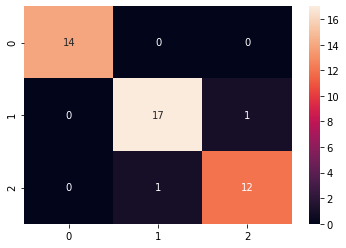

In [169]:
sns.heatmap(matriz, annot=True)


In [173]:
from sklearn.metrics import classification_report
error = classification_report(Y_predic, Y_test)
print(error)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



##### Recordar que random forest es la agrupacion de varios arboles de decision que cada uno arroja un resultado, una decision y se agrupan para tomar una generalizada o mejor


In [178]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,Y_train)
Y_predict = model.predict(X_test)

In [179]:
model.score(X_test,Y_test)

0.9555555555555556